# Exercises


### Evaluating Regression

In [2]:
from wrangle import wrangle_zillow
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression#import r2_score from sklearn
import sklearn.preprocessing

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


#### Getting zillow data

In [3]:
train, validate, test = wrangle_zillow()

<class 'numpy.float64'>
1.5
<class 'numpy.float64'>
0.5
<class 'numpy.float64'>
-169.5
<class 'numpy.float64'>
-331365.5
<class 'numpy.float64'>
-3284.045


In [3]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068354 entries, 898710 to 358089
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1068354 non-null  float64
 1   bathrooms   1068354 non-null  float64
 2   area        1068354 non-null  float64
 3   tax_value   1068354 non-null  float64
 4   year_built  1068354 non-null  object 
 5   taxamount   1068354 non-null  float64
 6   fips        1068354 non-null  object 
dtypes: float64(5), object(2)
memory usage: 65.2+ MB


In [4]:
df = train.copy()
df = df.drop(columns= ['bedrooms', 'bathrooms', 'year_built', 'taxamount', 'fips'])
df = df.sample(1000)


scaler = sklearn.preprocessing.MinMaxScaler()


In [5]:
X = df[['area']]
y = df['tax_value']

scaler.fit(X)
X_scaled = scaler.transform(X)

In [6]:
baseline = round(train.tax_value.mean(), 2)
baseline


341819.93

In [7]:
df['baseline'] = baseline

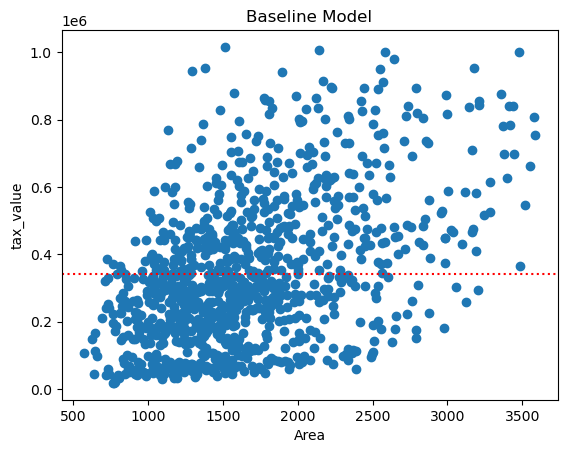

In [8]:
# plot data with baseline:

plt.scatter(X, y)
plt.axhline(baseline, ls=":", color='r')

plt.xlabel("Area")
plt.ylabel("tax_value")
plt.title("Baseline Model")
plt.show()

In [8]:

model = LinearRegression().fit(X, y)
predictions = model.predict(X)

df['predictions'] = predictions

residuals = y - predictions
residuals

baseline_residuals = y - baseline
baseline_residuals
df['baseline_residuals'] = baseline_residuals
df['residuals'] = residuals
df

,area,tax_value,baseline,predictions,baseline_residuals,residuals
1765013,1170.0,336546.0,341819.93,258193.972809,-5273.93,78352.027191
1052552,1217.0,196684.0,341819.93,266648.015901,-145135.93,-69964.015901
326358,694.0,20845.0,341819.93,172574.302345,-320974.93,-151729.302345
471021,1395.0,365634.0,341819.93,298665.455696,23814.07,66968.544304
103884,1714.0,118448.0,341819.93,356045.024768,-223371.93,-237597.024768
...,...,...,...,...,...,...
125701,1392.0,61461.0,341819.93,298125.835924,-280358.93,-236664.835924
1247125,1521.0,654647.0,341819.93,321329.486113,312827.07,333317.513887
1604194,1370.0,660000.0,341819.93,294168.624264,318180.07,365831.375736
680592,2460.0,133127.0,341819.93,490230.474697,-208692.93,-357103.474697


In [10]:
predictions

array([291070.87866945, 539688.22444154, 306861.67691891, 365112.17712804,
       497053.06916799, 500913.04207342, 258436.56228722, 212818.70067766,
       513545.68067299, 365813.99038357, 428450.82343977, 286509.09250849,
       258612.01560111, 312125.2763354 , 267033.77466749, 399325.57333521,
       225451.33927723, 231065.84532149, 524248.33281984, 187553.42347852,
       301247.17087465, 307563.49017444, 249488.44327919, 272121.92077009,
       218433.20672192, 340022.35324278, 324231.55499332, 237206.71130739,
       568988.92785999, 332477.86074581, 567760.75466281, 376165.73590266,
       612501.34970295, 376341.18921654, 271595.56082844, 255980.21589286,
       229662.21881042, 541442.75758037, 408624.598971  , 294229.03831934,
       458979.7000554 , 292474.50518051, 200186.06207809, 478104.11126864,
       375639.37596101, 228784.95224101, 446347.06145583, 418449.98454844,
       350549.55207576, 286684.54582237, 420204.51768727, 269665.57437573,
       191764.30301171, 3

#### Plot the residuals for the linear regression model that you made.

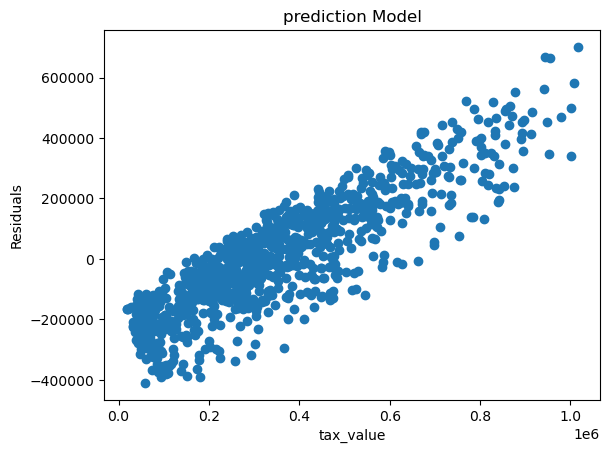

In [11]:
# plot data with baseline:

plt.scatter(y, residuals)


plt.xlabel("tax_value")
plt.ylabel("Residuals")
plt.title("prediction Model")
plt.show()

#### Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [12]:
df['baseline_residual_2'] = df.baseline_residuals**2
df['residual_2']= df.residuals**2



In [13]:
#add the residuals together
SSE_baseline = df.baseline_residual_2.sum()
SSE = df.residual_2.sum()

In [14]:
print(f"SSE Baseline = {SSE_baseline: .1f}")
print(f"SSE = {SSE:.1f}")

SSE Baseline =  47112440554192.0
SSE = 36452735763101.7


In [15]:
# calcaluate MSE

MSE_baseline = SSE_baseline/len(df)
MSE = SSE/len(df)

print(f"MSE baseline = {MSE_baseline:.1f}")
print(f'MSE = {MSE:.1f}')

MSE baseline = 47112440554.2
MSE = 36452735763.1


In [16]:
mean_squared_error(y, predictions)

36452735763.101685

In [17]:
# Calculate RMSE = (MSE)^(1/2)

RMSE_baseline = MSE_baseline**.5
RMSE = MSE**.5

print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))
print("RMSE = ", "{:.1f}".format(RMSE))


RMSE baseline =  217054.0
RMSE =  190926.0


In [18]:
# Total Sum of Squares = SSE for baseline

TSS = SSE_baseline
TSS

47112440554192.02

In [20]:
# ESS - Explained Sum of Squares ('Explained Error')

ESS = TSS - SSE
ESS
((predictions - y.mean())**2).sum()


10659304129941.836

In [21]:
# Calculate R^2 
R2 = ESS/TSS
R2

0.22626093375122008

In [ ]:
df

In [22]:
r2_score(y, df.predictions)

0.22625435353980028

In [ ]:
r2_score(y, df.baseline)

In [16]:
def regression_errors(y, yhat):
    residuals = y - yhat
    baseline = round(y.mean(), 2)
    baseline_residuals = y - baseline
    SSE = (residuals**2).sum()
    TSS = (baseline_residuals**2).sum()
    ESS = TSS - SSE
    MSE = SSE/len(y)
    RMSE = MSE**.5
    
    values = {
        'SSE' : SSE,
        'TSS' : TSS,
        'ESS' : ESS,
        'MSE' : MSE,
        'RMSE' : RMSE   
        }
    return values

In [24]:
model = regression_errors(y, predictions)

In [17]:
def baseline_mean_errors(y):
    baseline = round(y.mean(), 2)
    residuals = y - baseline
    SSE =(residuals**2).sum()
    MSE = SSE/len(y)
    RMSE = MSE**.5 
    values = {
        'SSE' : SSE,
        'MSE' : MSE,
        'RMSE' : RMSE 
        }
    return values

In [26]:
baseline = baseline_mean_errors(y)

In [27]:
model['SSE'] < baseline['SSE']

True

In [32]:
print(model, baseline)

{'SSE': 36452735763101.69, 'TSS': 47112039893043.54, 'ESS': 10659704791090.336, 'MSE': 36452735763.101685, 'RMSE': 190925.995514235} {'SSE': 47112039893043.54, 'MSE': 36452735763.101685, 'RMSE': 190925.995514235}


In [18]:
def better_than_baseline(y, yhat):
    model_score = regression_errors(y, yhat)['RMSE']
    baseline_score = baseline_mean_errors(y)['RMSE']
    if model_score < baseline_score:
        return True
    else: 
        return False
    

In [19]:
better_than_baseline(y, predictions)

True

In [ ]:
model['RMSE']

In [ ]:
baseline['RMSE']

In [ ]:
x = np.full(y.shape, baseline)
len(x) == len(y)
len(predictions) == len(y)

In [ ]:
baseline =  round(y.mean(), 2)
baseline_arr = np.full(y.shape , baseline)
base_df = pd.DataFrame(baseline_arr)
baseline_score = r2_score(y, baseline_arr)


In [ ]:
type(y)